# 3D Interpolation

Attempting to implement regular grid ``scipy.interpolate.RegularGridInterpolator`` and radial basis ``scipy.interpolate.RBFInterpolator``.

Useful links:
- https://stackoverflow.com/questions/54020710/linear-interpolation-of-3d-data-in-python
- https://blog.finxter.com/scipy-interpolate-1d-2d-and-3d/
- https://stackoverflow.com/questions/46040382/spline-interpolation-in-3d-in-python
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.RBFInterpolator.html

In [7]:
%matplotlib notebook

Setting up a grid for testing

<IPython.core.display.Javascript object>


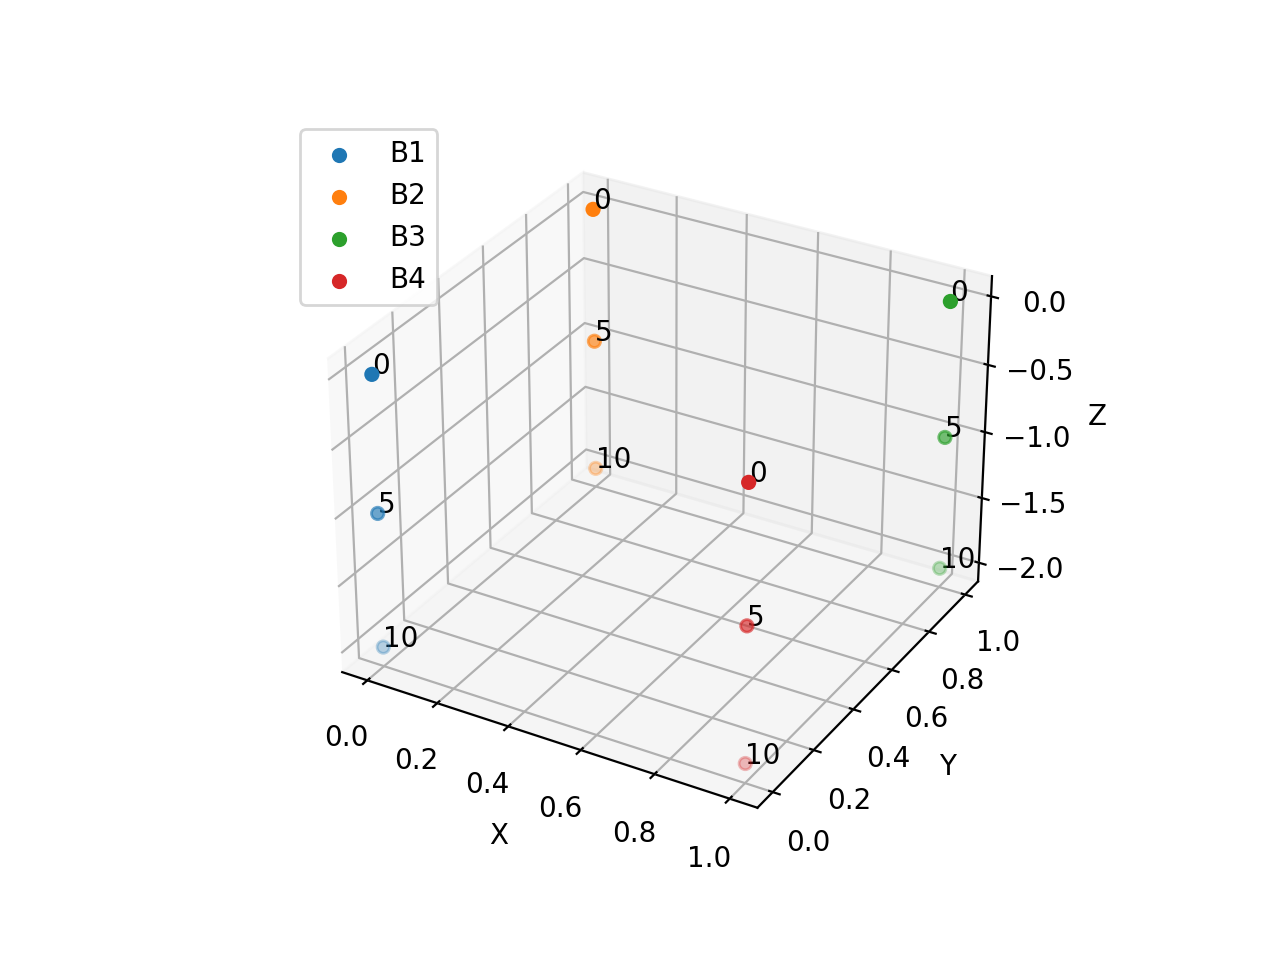

In [25]:
import numpy as np
import matplotlib.pyplot as plt


b1 = {
    'x': [0, 0, 0],
    'y': [0, 0, 0],
    'z': [0, -1, -2],
    'n': [0, 5, 10],
    'l': 'B1'
}

b2 = {
    'x': [0, 0, 0],
    'y': [1, 1, 1],
    'z': [0, -1, -2],
    'n': [0, 5, 10],
    'l': 'B2'
}

b3 = {
    'x': [1, 1, 1],
    'y': [1, 1, 1],
    'z': [0, -1, -2],
    'n': [0, 5, 10],
    'l': 'B3'
}

b4 = {
    'x': [1, 1, 1],
    'y': [0, 0, 0],
    'z': [0, -1, -2],
    'n': [0, 5, 10],
    'l': 'B4'
}

bor_logs = [b1, b2, b3, b4]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for bor in bor_logs:
    ax.scatter3D(bor['x'], bor['y'], bor['z'], label=bor['l'])
    for i in range(len(bor['n'])):
        ax.text(bor['x'][i], bor['y'][i], bor['z'][i], bor['n'][i])

        
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()

plt.show()

[[-1.         -1.        ]
 [-1.         -0.95918367]
 [-1.         -0.91836735]
 ...
 [ 1.          0.91836735]
 [ 1.          0.95918367]
 [ 1.          1.        ]]
[ 0.00044436  0.00029394  0.00028548 ... -0.00215858 -0.0024671
 -0.00282892]


<IPython.core.display.Javascript object>


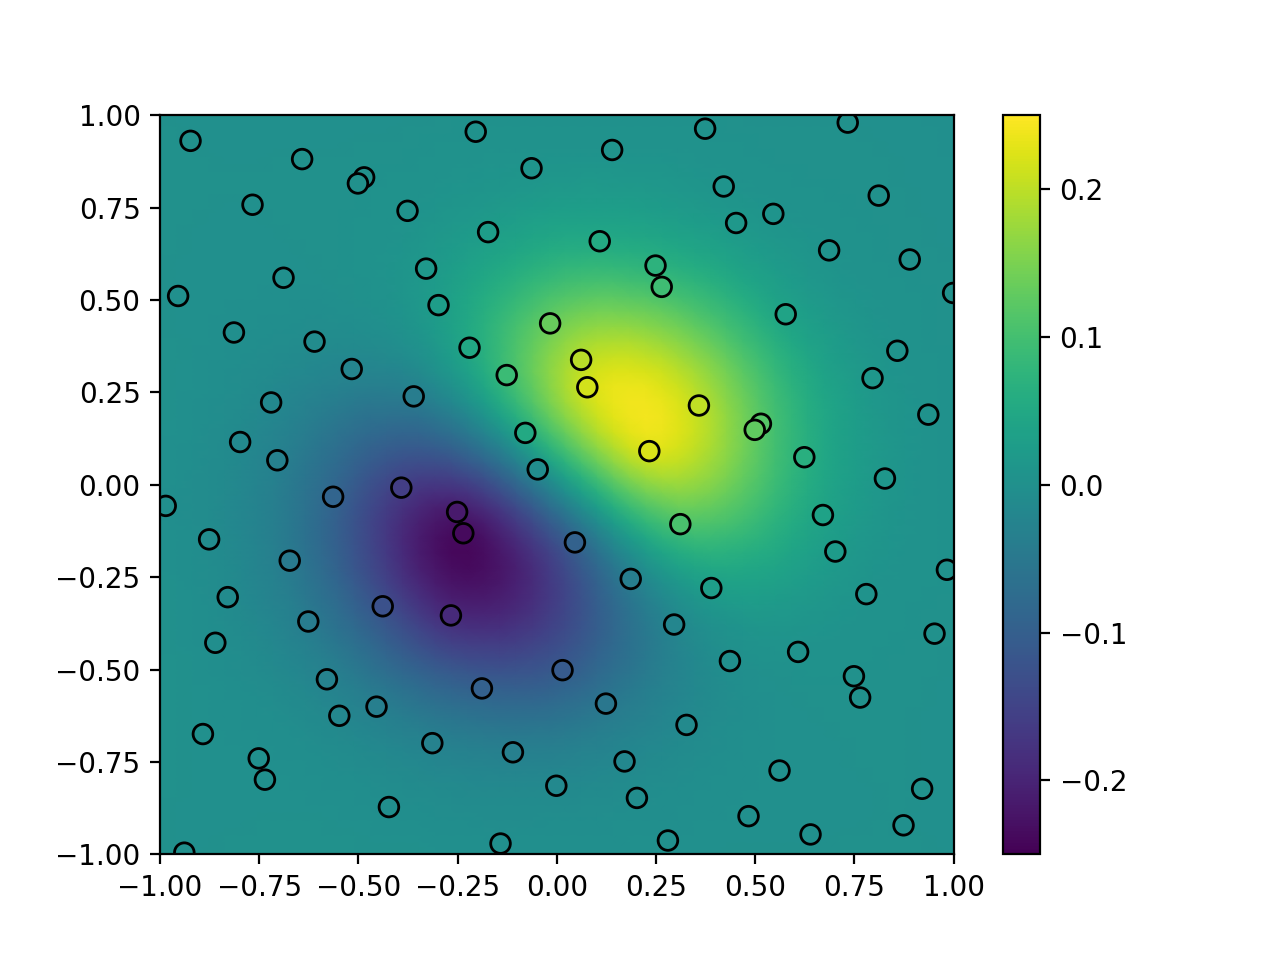

In [28]:
import matplotlib.pyplot as plt
from scipy.interpolate import RBFInterpolator
from scipy.stats.qmc import Halton
import numpy as np

rng = np.random.default_rng()
xobs = 2*Halton(2, seed=rng).random(100) - 1
yobs = np.sum(xobs, axis=1)*np.exp(-6*np.sum(xobs**2, axis=1))
xgrid = np.mgrid[-1:1:50j, -1:1:50j]
xflat = xgrid.reshape(2, -1).T

print(xflat)

yflat = RBFInterpolator(xobs, yobs)(xflat)

print(yflat)

ygrid = yflat.reshape(50, 50)
fig, ax = plt.subplots()
ax.pcolormesh(*xgrid, ygrid, vmin=-0.25, vmax=0.25, shading='gouraud')
p = ax.scatter(*xobs.T, c=yobs, s=50, ec='k', vmin=-0.25, vmax=0.25)
fig.colorbar(p)
plt.show()